In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# 获取数据
filepath = r'D:\GithubRepository\1. Atmosphere\读论文笔记\热带气旋\First_about_SizeAndMLSP\Reporter\my_new_cat\accord_wind_max.xlsx'
WorkBook_BasedOnPres = pd.ExcelFile(filepath)
Save_Worksheet = pd.ExcelWriter('IKE_SaveSheet' '.xlsx' , engine='openpyxl' )

# 查看所有表格的名称
sheet_names = WorkBook_BasedOnPres.sheet_names    
pi = np.pi

for i_sheet in range(6):
    single_sheet = WorkBook_BasedOnPres.parse(sheet_names[i_sheet])
    otherVar_allData = single_sheet.iloc[:,8]
    DeepTCSize_R34_allData = single_sheet.iloc[:,-5] * 1852
    DeepTCSize_R50_allData = single_sheet.iloc[:,-4] * 1852
    DeepTCSize_R64_allData = single_sheet.iloc[:,-3] * 1852
    V_max_allData = single_sheet.iloc[:,9] 
    R_Vmax_allData = single_sheet.iloc[:,-2] * 1852 

    df_dicmapData = {}
    single_sheet_IKE_List  = [] 
    single_sheet_other_col_var_List  = []

    for i_IKE in range(len(DeepTCSize_R50_allData)):
        # IKE 18 ~ 26
        if DeepTCSize_R50_allData[i_IKE] > 0 :
            Mean_wind = 20 
            Area = pi * (( DeepTCSize_R34_allData[i_IKE]**2 )  - ( DeepTCSize_R50_allData[i_IKE]**2 )   )
        elif   np.isnan(DeepTCSize_R50_allData[i_IKE]) :
            if (V_max_allData[i_IKE] > 26) and (DeepTCSize_R34_allData[i_IKE] > R_Vmax_allData[i_IKE]) :
                Mean_wind = 20 
                Area =  pi * (( DeepTCSize_R34_allData[i_IKE]**2 )  - ( (0.75 *R_Vmax_allData[i_IKE] )**2)   )
            elif (V_max_allData[i_IKE] < 26 ) and (DeepTCSize_R34_allData[i_IKE] > R_Vmax_allData[i_IKE]) :
                Mean_wind = 0.25 * V_max_allData[i_IKE] + 0.75 * 18 
                Area =  pi * (( DeepTCSize_R34_allData[i_IKE]**2 )  - ( (0.75 *R_Vmax_allData[i_IKE] )**2)  )
            elif ((R_Vmax_allData[i_IKE] - DeepTCSize_R34_allData[i_IKE] ) < 1)  : 
                Mean_wind = 18 
                Area = pi * (( DeepTCSize_R34_allData[i_IKE]**2 )  - ( ((0.5) * DeepTCSize_R34_allData[i_IKE])**2 )) 
        IKE_34_50 = (1/2) * (Area) * (Mean_wind**2)
    
        # IKE 26 ~ 33
        R_33 =  DeepTCSize_R64_allData[i_IKE]
        V_Max = V_max_allData[i_IKE]
        R_26  = DeepTCSize_R50_allData[i_IKE]
        R_max = R_Vmax_allData[i_IKE]
        
        if R_33 > 0 : 
            Mean_wind = 27.75 
            Area = pi * ((R_26**2)  - ( R_33 **2) )
        elif np.isnan(R_33) : 
            if (V_Max > 33 and R_26 > R_max) :
                Mean_wind = 27.75 
                Area = pi * ((R_26**2)  -  ((0.75*R_max)**2) ) 
            elif (V_Max < 33 and R_26 > R_max) :
                Mean_wind = 0.25*V_Max + 0.75 * 26 
                Area = pi * ((R_26**2)  -  ((0.75*R_max)**2) ) 
            elif (R_26 <= R_max) : 
                Mean_wind = 26 
                Area = pi * ((R_26**2)  -  ((0.5*R_26)**2) ) 
        IKE_50_64 = (1/2) * Area * (Mean_wind**2)

        # IKE Hurricane ( wind speed supass 33 m/s) 
        R_max = R_Vmax_allData[i_IKE]
        R_33 =  DeepTCSize_R64_allData[i_IKE] 
        V_Max = V_max_allData[i_IKE]
        if V_Max > R_33 :
            if R_33 > R_max: 
                Mean_wind = 0.25 * V_Max + 0.75 * 33 
                Area = pi * [ (R_33**2 ) - ((0.75 * R_max)**2) ]
            elif (R_33 == R_max) :
                Mean_wind = 0.25 * V_Max + 0.75 * 33 
                Area = pi * [ (R_33**2 ) - ((0.75 * R_33)**2) ]
            elif (R_33 < R_max) :
                Mean_wind = 0.1 * V_Max + 0.9 * 33
                Area = pi * (R_33**2 ) - ((0.75 * R_33)**2) 
        else:
            Mean_wind = 0.1 * V_Max + 0.9 * 33
            Area = pi * (R_33**2 ) - ((0.75 * R_max)**2) 
        
        IKE_supass33_Hurricane = (1/2) * Area * (Mean_wind**2)

        # sum 
        Complete_IKE = IKE_34_50 + IKE_50_64 + IKE_supass33_Hurricane
        single_sheet_IKE_List.append(Complete_IKE / (10**12))           # 此时算得的能量的单位是 TJ
        single_sheet_other_col_var_List.append(otherVar_allData[i_IKE])

    # 将数据先存储为一个字典, 之后将将字典转化为datafrome , 这样存储的更加快速一点. 
    df_dicmapData["IKE"] = single_sheet_IKE_List
    df = pd.DataFrame(df_dicmapData)  
    df.to_excel(Save_Worksheet , sheet_name='IKE_SaveSheet'+ sheet_names[i_sheet] + '.xlsx', index=False)  

    # # 添加气压
    # df_dicmapData["PRE"] = single_sheet_other_col_var_List
    # df_2 = pd.DataFrame( df_dicmapData )  
    # df.to_excel(Save_Worksheet , sheet_name='PRE_SaveSheet'+ sheet_names[i_sheet] + '.xlsx', index=False) 
Save_Worksheet.save()
Save_Worksheet.close()



C:\Users\2892706668\AppData\Local\Temp\ipykernel_10104\1201482619.py:99: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  Save_Worksheet.save()


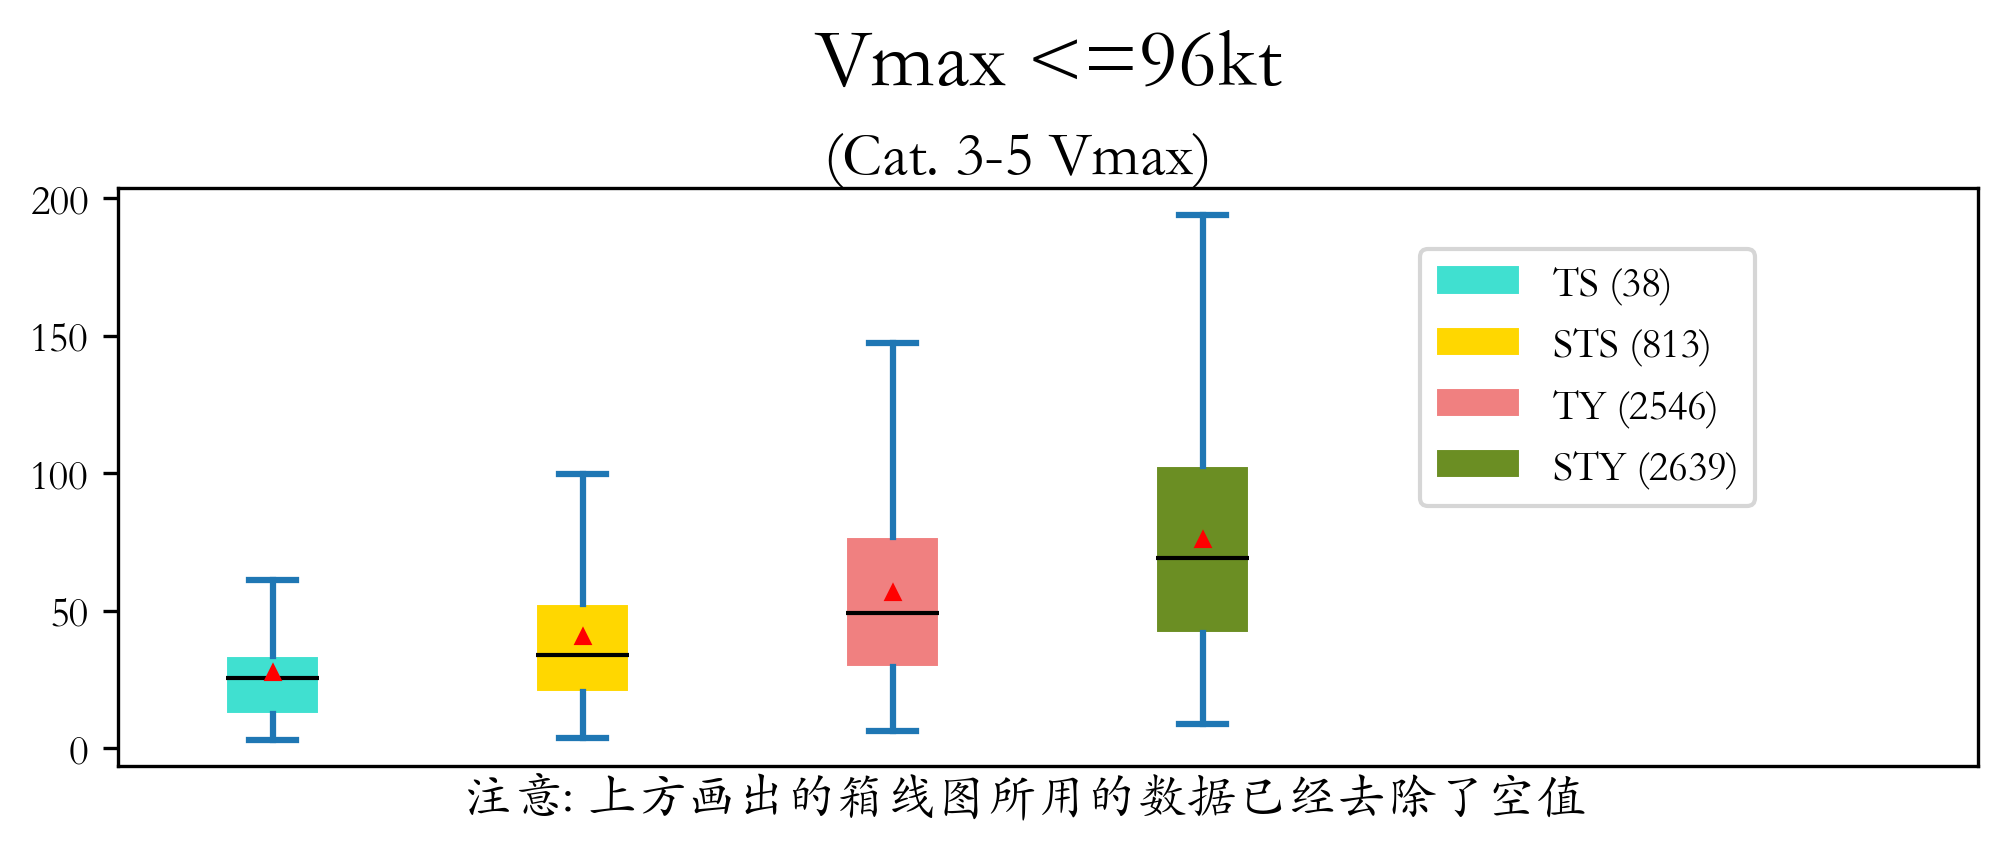

{'TS': 3633, 'STS': 4575, 'TY': 3260, 'STY': 2793, 'SuperTY': 1905, 'TD': 0}


In [28]:
# 开始画箱线图
image_data_filepath = r"D:\GithubRepository\1. Atmosphere\读论文笔记\热带气旋\First_about_SizeAndMLSP\Code\IKE_SaveSheet.xlsx"

Image_data_based_PreSheet = pd.ExcelFile(image_data_filepath)
all_sheetnames = Image_data_based_PreSheet.sheet_names

# 获取 并 处理 数据                      
all_data_to_Plot = []
various_R_number = {}
various_R_number_including_nan = {}
various_range_list = ["TS", "STS" , "TY" , "STY", "SuperTY" , "TD"]     # 标签 
for i, specific_wind in enumerate(various_range_list):
    i_sheet=  Image_data_based_PreSheet.parse( all_sheetnames[i] )
    i_IKE = i_sheet.iloc[:,0] 
    various_R_number_including_nan[specific_wind] = len(i_IKE)

    i_IKE = i_IKE.dropna()  # 删除包含NaN的行
    all_data_to_Plot.append(i_IKE)
    various_R_number[specific_wind] = len(i_IKE)

# plot
fig, ax = plt.subplots(figsize = (8,2.5), dpi=300)
# 防范中文乱码
plt.rcParams['font.sans-serif']=['STKaiti'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

for i in range(4): 
    if i == 0 : 
        facecolor = "turquoise"
        label = various_range_list[0]+ " (" + str(various_R_number[various_range_list[0]]) + ")"
    elif i== 1 : 
        facecolor = "gold"
        label = various_range_list[1] + " (" + str(various_R_number[various_range_list[1]]) + ")"
    elif i == 2 :
        facecolor = "lightcoral"
        label = various_range_list[2]+" (" +  str(various_R_number[various_range_list[2]]) + ")"
    elif i == 3 :
        facecolor = "olivedrab"
        label = various_range_list[3] +" (" +  str(various_R_number[various_range_list[3]]) + ")"
        i_position = i + 1
    VP = ax.boxplot(  all_data_to_Plot[i], 
                    positions= [i],
                    widths= 0.3,
                    showmeans=True, showfliers=False, patch_artist=True,
                    meanprops={"marker": '^',
                           "markeredgecolor": 'red',
                           "markerfacecolor": 'red',
                           "markersize": 3},
                    medianprops={"color": "black", "linewidth": 1},
                    boxprops={"facecolor": facecolor,
                              "edgecolor": "white",
                              "linewidth": 0.5},
                    whiskerprops={"color": "C0", "linewidth": 1.5},
                    capprops={"color": "C0", "linewidth": 1.5})  

# 下方代码是由于 画的图有点挤, 所以想多出一个位置来放图例
    VP = ax.boxplot([], 
                    positions= [5],
                    widths= 0.4,
                    showmeans=True, showfliers=False, patch_artist=True,
                    meanprops={"marker": '^',
                           "markeredgecolor": 'red',
                           "markerfacecolor": 'red',
                           "markersize": 6},
                    medianprops={"color": "black", "linewidth": 1},
                    boxprops={"facecolor": facecolor,
                              "edgecolor": "white",
                              "linewidth": 0.5},
                    whiskerprops={"color": "C0", "linewidth": 1.5},
                    capprops={"color": "C0", "linewidth": 1.5})  
    # 设置图例
    VP["boxes"][0].set_label(label)   # 其实获取到了 一个画布中的所有的箱体对象.  所以
    VP["medians"][0].set_label("_nolegend_")
    # VP["fliers"][0].set_label("_nolegend_")

ax.legend(loc=(0.70, 0.45) , fontsize=10)                     # 调整图例出现的位置
# ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=10))  # 设置y轴出现的刻度数量
ax.set_title("Vmax <=96kt", fontsize=20, pad=25)
fig.text(0.5,0.9, "(Cat. 3-5 Vmax)" , fontsize=15, ha="center")
myself_Introduction = " 注意: 上方画出的箱线图所用的数据已经去除了空值"
fig.text(0.5,0.05, myself_Introduction , fontsize=12, ha="center" )
plt.xticks([])

plt.savefig("test.jpg",dpi=300)
plt.show()
print(various_R_number_including_nan)  

In [7]:
# 计算相关系数
public_filepath = r"D:\GithubRepository\Atmosphere\读论文笔记\热带气旋\First_about_SizeAndMLSP\Reporter\\"
file_name = [
                # "1988_2021基于风速大于96kt分类.xlsx",
                # "1988_2021基于风速小于96kt分类.xlsx",
                # "1988_2021基于气压小于等于960hPa.xlsx",
                # "1998_2021_基于气压大于960hPa.xlsx" 
                "原始数据.xlsx"
]

all_data = []

for i in range(1):
    two_initial_data = pd.ExcelFile( public_filepath +  file_name[i])
    i_sheet = two_initial_data.sheet_names[0]
    sgl_col_all_data_1  =  two_initial_data.parse(i_sheet).iloc[:,7]
    sgl_col_all_data_2 =  two_initial_data.parse(i_sheet).iloc[:,8]
    all_data.append(sgl_col_all_data_1)
    all_data.append(sgl_col_all_data_2)
    

In [ ]:
# 判断  是否存在 nan
a = all_data[1].isnull().values.any()
print(a)

In [8]:
# 公式系数准备
r_VmaxWithMSLP = np.corrcoef(all_data[0],all_data[1])[0,1]
ave_data1 = np.mean(all_data[0])   # 风速
ave_data2 = np.mean(all_data[1])   # 气压
a = ave_data1 - r_VmaxWithMSLP



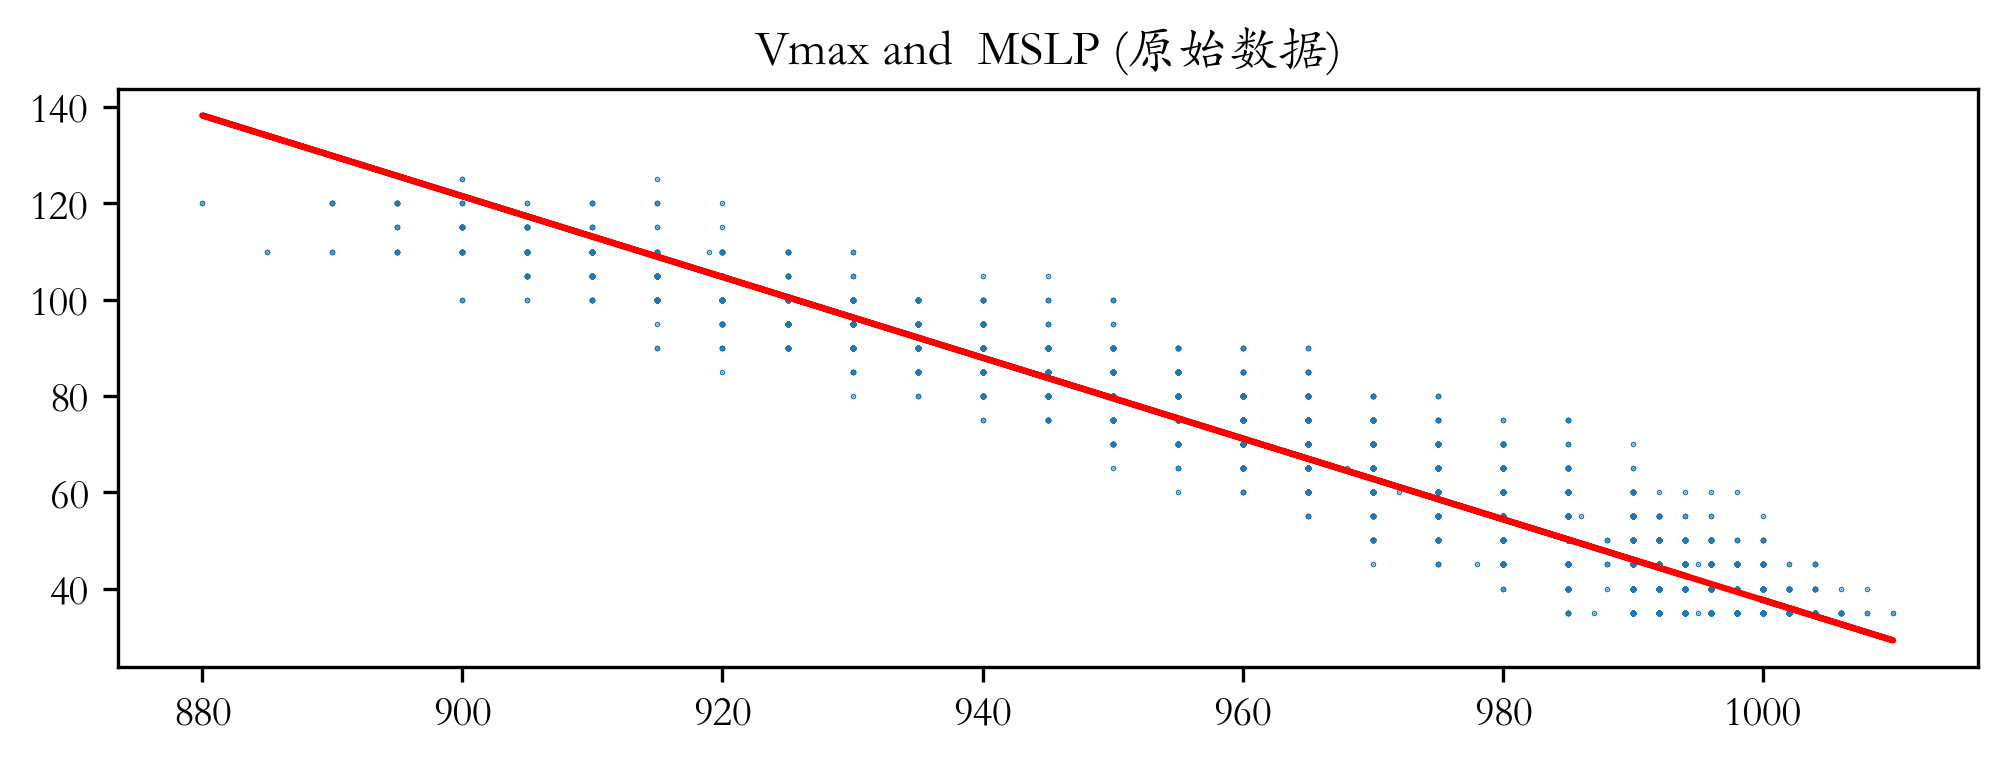

In [13]:
import matplotlib.pyplot as plt

# 假设相关数据已经保存在 all_data[0] 和 all_data[1] 中
plt.rcParams['font.sans-serif']=['STKaiti'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
fig, ax = plt.subplots(figsize=(8, 2.5), dpi=300)

# 绘制散点图
ax.scatter(all_data[1], all_data[0], s=0.1)

# # 计算拟合曲线的斜率和截距
slope, intercept = np.polyfit(all_data[1], all_data[0], deg=1)
# x_range = np.linspace(min(all_data[0]), max(all_data[0]), 100)  # 构建拟合曲线的x值范围
y_fit = slope * all_data[1] + intercept  # 计算拟合曲线的y值
ax.plot(all_data[1], y_fit, color='red', label='Fit Line')  # 绘制拟合曲线
ax.set_title("Vmax and  MSLP (原始数据)")
plt.show(block=True)
